In [70]:
%load_ext autoreload
%autoreload 2
import os
from pyannote.core import json
import src.embedding_extractor as ee
import pandas as pd

diarized_dir = '/Users/rahulbrito/Documents/projects/infantvoice/data/Full_Readings/031622_diarized'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [71]:
diarized = [(json.load_from(os.path.join(diarized_dir,file)),file) for file in os.listdir(diarized_dir)]
diarized

[(<pyannote.core.annotation.Annotation at 0x7fe10ac46d00>, '007.json'),
 (<pyannote.core.annotation.Annotation at 0x7fe179a566a0>, '011.json'),
 (<pyannote.core.annotation.Annotation at 0x7fe10ac10c10>, '010.json'),
 (<pyannote.core.annotation.Annotation at 0x7fe10ab87cd0>, '006.json'),
 (<pyannote.core.annotation.Annotation at 0x7fe10ab95550>, '001.json'),
 (<pyannote.core.annotation.Annotation at 0x7fe1197a42b0>, '017.json'),
 (<pyannote.core.annotation.Annotation at 0x7fe1197b39d0>, '016.json'),
 (<pyannote.core.annotation.Annotation at 0x7fe1197c2a30>, '020.json'),
 (<pyannote.core.annotation.Annotation at 0x7fe10aba8cd0>, '019.json'),
 (<pyannote.core.annotation.Annotation at 0x7fe10abbd250>, '015.json'),
 (<pyannote.core.annotation.Annotation at 0x7fe10abd3bb0>, '003.json'),
 (<pyannote.core.annotation.Annotation at 0x7fe10ac4ca30>, '002.json'),
 (<pyannote.core.annotation.Annotation at 0x7fe10ac46220>, '014.json'),
 (<pyannote.core.annotation.Annotation at 0x7fe179a64d60>, '018.

In [72]:
# don't record Victoria
# make sure background noise is off (e.g. TV, radio)
# can we somehow not record the baby?
# can we control for microphone? 

In [105]:
data_clean_lower = {int(os.path.splitext(part)[0]):data.label_timeline('SPEAKER_01') for data,part in diarized if int(os.path.splitext(part)[0])<11}
data_clean_upper = {int(os.path.splitext(part)[0]):data.label_timeline('SPEAKER_00') for data,part in diarized if int(os.path.splitext(part)[0])>=11}
data_clean = data_clean_lower|data_clean_upper

In [108]:
wav_files='/Users/rahulbrito/Documents/projects/infantvoice/data/Full_Readings/0300222_recordings_16khz'
save_dir = '/Users/rahulbrito/Documents/projects/infantvoice/data/embeddings'
save_name = '03016_diarized_pyv2.csv'
emb = ee.pyannote_extract_directory(wav_files, data_clean,save_dir,save_name,save=True)

Processing019.wav
Done


In [107]:
from pyannote.core import Segment, notebook, SlidingWindowFeature, timeline, Timeline

t = 2
long_turns = Timeline(segments=[s for s in data_clean[12] if s.duration > t])

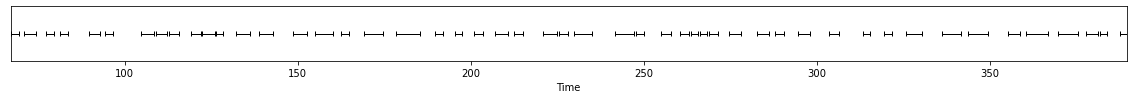

In [78]:
long_turns

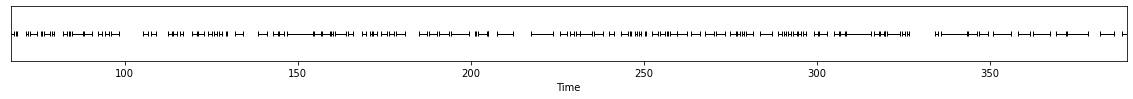

In [106]:
data_clean[11]

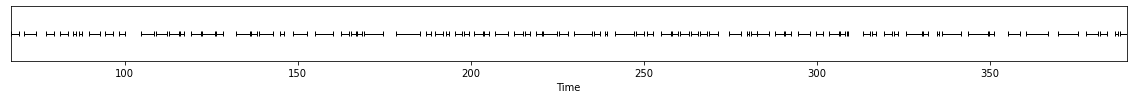

In [76]:
filename = '007.wav'
data_clean[int(os.path.splitext(filename)[0])]

In [109]:
emb

,0,1,2,3,4,5,6,7,8,9,...,503,504,505,506,507,508,509,510,511,part_id
0,-10.136527,-3.125917,-10.331757,-1.180206,-26.245205,-56.038692,-35.224476,-27.972284,5.138109,-60.326069,...,-17.009148,1.681732,-19.023834,17.905651,21.377089,-42.820557,79.471924,-10.368679,-95.338295,014
1,50.489548,-110.008377,-0.590759,-1.189259,3.504568,6.632331,-70.230476,33.465908,-101.089554,-43.569405,...,-109.646477,61.087456,-19.374933,39.253193,39.571968,-1.199455,58.643959,44.823673,-22.727133,014
2,37.898300,-86.338875,-14.022160,-34.706005,-38.721508,9.469261,-52.388443,27.720051,-85.997932,-37.090630,...,-101.845337,4.521521,12.490974,18.454252,37.665180,-39.916145,40.876434,38.000446,-71.427124,014
3,48.517708,7.211029,49.455078,1.669292,-64.081528,26.369207,-59.947876,84.166046,-54.617989,-28.433584,...,0.107970,23.352934,-43.182964,-44.737869,7.221458,28.808392,18.685982,48.695702,-73.037109,014
4,61.146248,-20.901834,47.949970,-44.284637,-75.048256,-41.969936,-91.161453,54.554482,-52.140934,-12.644939,...,-34.289215,31.554251,-27.430756,-19.728785,-2.188049,5.307766,38.721119,38.210636,-60.128883,014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
961,-33.648369,-6.031366,33.178612,-44.475708,50.353676,-5.186010,-65.842865,-64.513382,-12.315617,71.274887,...,-59.763523,-100.657059,45.620274,-41.718071,-74.235100,51.542225,113.990509,38.994003,109.751663,019
962,-6.794928,-38.090275,57.304073,30.047443,23.473091,-17.807068,9.044193,-21.274036,-38.457226,28.642159,...,1.369493,-51.332802,70.115318,-30.610979,-7.660095,41.410130,106.859123,-37.730556,93.772568,019
963,21.342968,-20.902092,39.226509,-7.929600,9.895487,-2.457574,10.110657,-15.998243,-90.104095,11.465382,...,-18.588779,-59.642109,25.068806,-58.433266,-12.606747,72.779907,45.584869,16.468784,23.411119,019
964,0.587035,-65.204903,3.330925,-5.009827,14.059995,-0.025299,24.671848,-36.163719,-99.550514,37.885227,...,-4.248489,-22.533478,49.162506,-58.329727,-13.883266,46.714058,24.086943,2.045399,64.776199,019


In [116]:
emb.groupby('part_id').count()

,0,1,2,3,4,5,6,7,8,9,...,502,503,504,505,506,507,508,509,510,511
part_id,,,,,,,,,,,,,,,,,,,,,
001,50,50,50,50,50,50,50,50,50,50,...,50,50,50,50,50,50,50,50,50,50
002,52,52,52,52,52,52,52,52,52,52,...,52,52,52,52,52,52,52,52,52,52
003,26,26,26,26,26,26,26,26,26,26,...,26,26,26,26,26,26,26,26,26,26
004,34,34,34,34,34,34,34,34,34,34,...,34,34,34,34,34,34,34,34,34,34
005,42,42,42,42,42,42,42,42,42,42,...,42,42,42,42,42,42,42,42,42,42
006,72,72,72,72,72,72,72,72,72,72,...,72,72,72,72,72,72,72,72,72,72
007,40,40,40,40,40,40,40,40,40,40,...,40,40,40,40,40,40,40,40,40,40
008,44,44,44,44,44,44,44,44,44,44,...,44,44,44,44,44,44,44,44,44,44
009,67,67,67,67,67,67,67,67,67,67,...,67,67,67,67,67,67,67,67,67,67
